# The Complex Circle Problem 

Consider a circle of radius one centered at the origin of a complex plane. Given an $n \in \mathbb{N}$ and $\theta_0 \in \mathbb{R}$, find the product of the $n$ complex numbers $z_1, \dots, z_{n}$ that represent the $n$ equal parts into which the circle is divided, considering all possible rotations of these parts by $\theta_0$, the angle between the *x-axis* to the last complex number $z_{n}$ (i.e., $z_{n} = \cos\theta_0 + i \sin\theta_0$).

## Python Implementation

Along this notebook, we will use the following Python implementation of the complex circle problem:

* **ComplexCircle(n, theta0)**: class that represents the complex circle problem. It receives as input the number of parts $n$ and the angle $\theta_0$ between the *x-axis* and the last complex number $z_{n}$.

* **Theta(theta0)**: class that represents the theta function $\theta(n)$ (we will introduce the theta function later). It receives as input the angle $\theta_0$ between the *x-axis* and the last complex number $z_{n}$.

* **visualize(\*complex_circle_problem, show_angles, show_result)**: function for plotting the complex circle problem. It receives as input a list of complex circle problems and two boolean variables. If *show_angles* is *True*, it shows the angles between the *x-axis* and the complex numbers $z_1, \dots, z_{n}$. If *show_result* is *True*, it shows the result of the complex circle problem.

* **print_makrdown(\*args)**: function for printing markdown text. It receives as input a list of strings.


You can find the source code of the implementation in the [src](https://github.com/dylannalex/math_blog/tree/main/complex_circle_problem/src) folder.

In [1]:
from src import ComplexCircle, Theta, visualize, print_markdown

## Example

As an example, let $n = 4$ and consider two different values of $\theta_0$: $0$ and $0.5$.

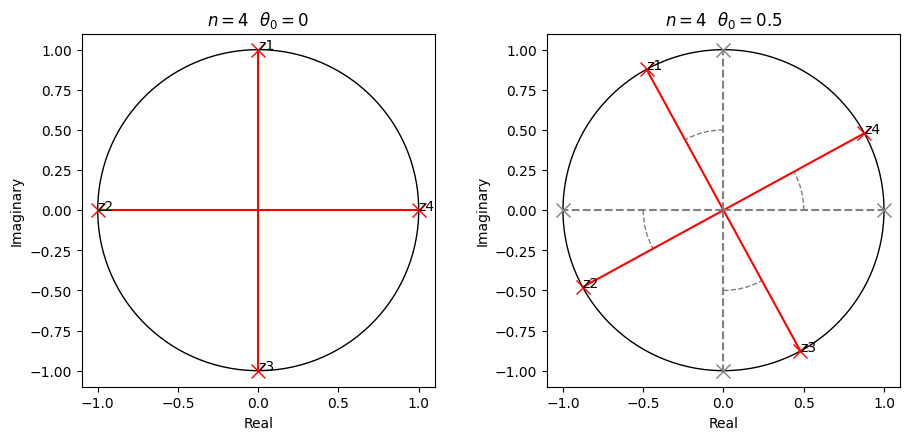

In [2]:
visualize(
    ComplexCircle(n=4, theta0=0),
    ComplexCircle(n=4, theta0=0.5),
    show_result=False,
    show_angles=True
)

As shown above, when we increase $\theta_0$ by $0.5$, $z_1, z_2, z_3, z_4$ are rotated $0.5$ radians anticlockwise.

## Solution

To find the product of the $n$ complex numbers $z_1, z_2, \dots, z_{n}$, we can first find the polar form of each complex number, that is

$$z_k = r_k e^{i \theta_k}, k \in \{1,2,\dots,n\}$$

We know that all the complex numbers live on the unit circle circumference

$$r_k = 1$$

and that their angles are equally spaced

$$\theta_k = \theta_{k-1} + \Delta \theta = \theta_{k-1} + \frac{2\pi}{n}$$

Because we defined $\theta_0$ to be the angle between the *x-axis* to the last complex number $z_{n}$, we can deduce that

$$\theta_k = k \cdot \Delta \theta + \theta_0$$

Then, the product of $z_1, z_2, \dots, z_{n}$ is 

$$
\begin{align*}
P_{n\theta_0} &= 
\prod_{k=1}^{n} e^{i (k \Delta \theta + \theta_0)}
= \prod_{k=1}^{n} e^{i k \Delta \theta} e^{i \theta_0}
\\
&= e^{i \theta_0 n} \prod_{k=1}^{n} e^{i k \Delta \theta} 
= e^{i \theta_0 n} e^{i \Delta \theta \sum_{k=1}^{n} k}
\\
&= e^{i \theta_0 n} e^{i \Delta \theta{n(n+1)\over 2}}
= e^{i \theta_0 n} e^{i \pi (n+1)}
\\
\\
\therefore P_{n\theta_0} &= e^{i [\pi (n+1) + \theta_0 n]} 
= e^{i [n(\pi + \theta_0) + \pi]}
\end{align*}
$$

This means that the resulting complex number $P_{n\theta_0}$ has a norm of $r = 1$ and an angle of $\theta=n(\pi + \theta_0) + \pi$.

## $\theta(n)$ function

Since $P_{n \theta_0}$ is always a complex number sitting on the unit circle, we can completely describe it with its angle $\theta$

$$
P_{n \theta_0} = e^{i\theta}
$$

What is interesting to analyze is how $P_{n \theta_0}$ angle $\theta$ changes when we increase the number of complex numbers $n$ for a fixed initial rotation $\theta_0$. To do this we define the $\theta(n)$ function.

### Definition

The function $\theta(n)$ returns the angle $\theta$ of the resulting complex number $P_{n \theta_0}$ for the *complex circle problem* with $n$ complex numbers and an initial rotation $\theta_0$.

$$
\begin{align*}
\theta &: \mathbb{N} \to \mathbb{R}\\
\theta(n) &= n(\pi + \theta_0) + \pi
\end{align*}
$$

### Example

Let's compute the $\theta$ function with an initial rotation of $\theta_0 = \frac{\pi}{4}$ for $n = 1, 2, 3, 4$.

$\theta(1) = 0.7853981633974483$

$\theta(2) = 4.71238898038469$

$\theta(3) = 8.63937979737193$

$\theta(4) = 12.566370614359172$

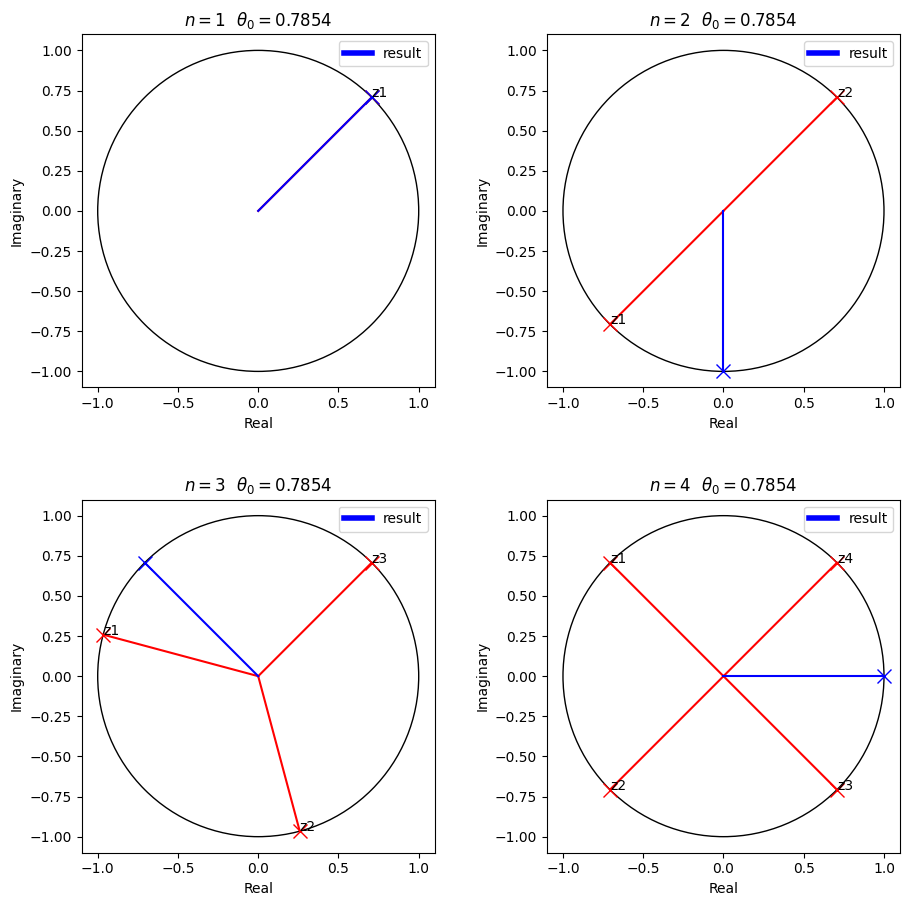

In [3]:
from math import pi

# Compute the theta function for n = 1, 2, 3, 4
theta0 = pi/4
theta = Theta(theta0)
print_markdown(
    f"$\\theta(1) = {theta(1)}$",
    f"$\\theta(2) = {theta(2)}$",
    f"$\\theta(3) = {theta(3)}$",
    f"$\\theta(4) = {theta(4)}$",
)

# Visualize the complex circle problem for theta = pi/4 and n = 1, 2, 3, 4
visualize(
    ComplexCircle(1, theta0),
    ComplexCircle(2, theta0),
    ComplexCircle(3, theta0),
    ComplexCircle(4, theta0)
    )

### Rotation Property

Increasing $n$ by one unit rotates $P_{n\theta_0}$ by an angle $\Delta \theta = \theta_0 + \pi$.

#### Demonstration

To find how $\theta(n)$ changes when $n$ is increased by one unit, we can calculate $\Delta \theta$

$$
\begin{align*}
\Delta \theta &= \theta(n+1) - \theta(n)\\
\Delta \theta &= (n+1)(\pi + \theta_0) + \pi - n(\pi + \theta_0) - \pi\\
\therefore \Delta \theta &= \pi + \theta_0
\end{align*}
$$

#### Defining $\theta(n)$ in terms of $\Delta \theta$

$\theta(n)$ can be defined recursively in terms of $\Delta \theta$. Let $u = n-1, n \in \mathbb{N}$

$$
\begin{align*}
\Delta \theta &= \theta(u+1) - \theta(u)\\
\theta(u+1) &= \theta(u) + \Delta \theta\\
\theta(n-1+1) &= \theta(n-1) + \Delta \theta\\
\therefore \theta(n) &= \theta(n-1) + \Delta \theta
\end{align*}
$$

Since $\theta(1) = \theta_0 + 2\pi = \theta_0$

$$
\begin{align*}
\theta(1) &= \theta_0\\
\theta(2) &= \theta(1) + \Delta \theta = \theta_0 + \Delta \theta\\
\theta(3) &= \theta(2) + \Delta \theta = \theta_0 + 2 \Delta \theta\\
\theta(4) &= \theta(3) + \Delta \theta = \theta_0 + 3 \Delta \theta\\
\vdots\\
\theta(n) &= \theta(n-1) + \Delta \theta = \theta_0 + (n-1) \Delta \theta\\
\therefore \theta(n) &= \theta_0 + (n-1) \Delta \theta\\
\\
\end{align*}
$$

#### Exercise

Find a value for $\theta_0$ such that $P_{n\theta_0}$ rotates $\frac{\pi}{2}$ radians anticlockwise when we increase $n$ by one unit.

##### Solution

$P_{n\theta_0}$ to rotate $\frac{\pi}{2}$ when $n$ is increased by one unit means that $\Delta \theta = \frac{\pi}{2}$, thus

$$
\begin{align*}
\Delta \theta &= \frac{\pi}{2}
\\
\pi + \theta_0 &= \frac{\pi}{2}
\\
\theta_0 &= -\frac{\pi}{2}
\end{align*}
$$

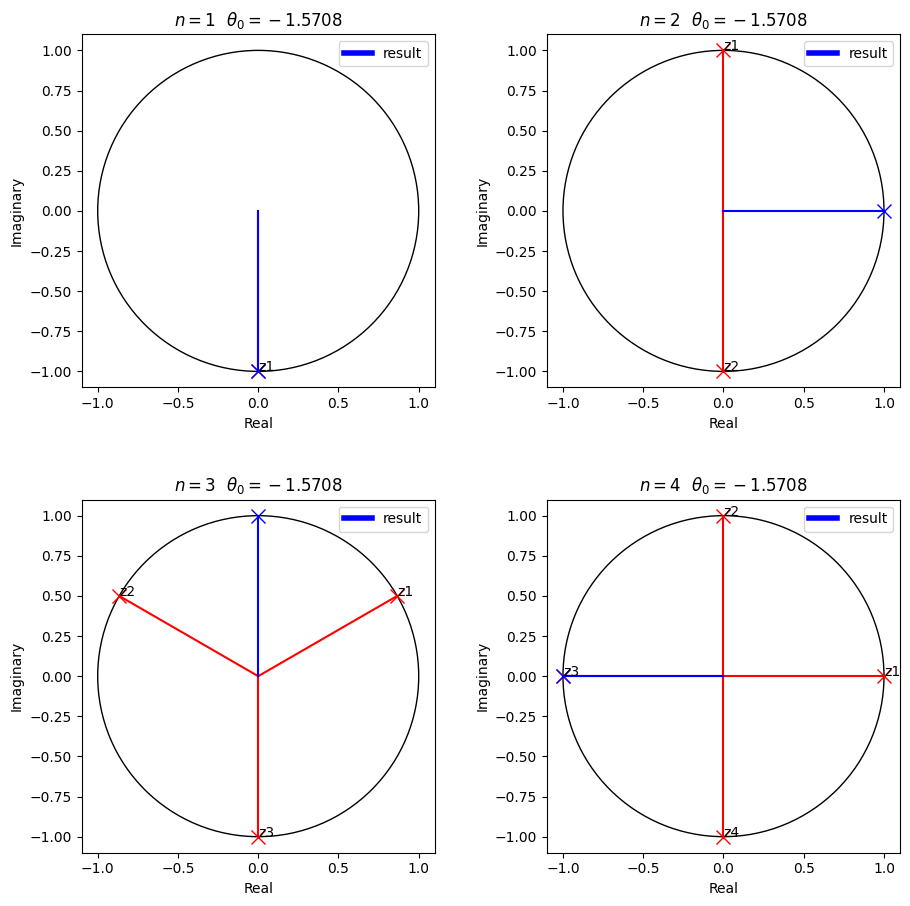

In [4]:
from math import pi

visualize(
    ComplexCircle(n=1, theta0=-pi/2),
    ComplexCircle(n=2, theta0=-pi/2),
    ComplexCircle(n=3, theta0=-pi/2),
    ComplexCircle(n=4, theta0=-pi/2),
    show_result=True,
    show_angles=False
)

Note that the resulting complex number $P_{n\theta_0}$ is plotted in blue.

### Sum Property

The sum of the arguments of the $N$ resulting complex number $P_{n_k\theta_0}$ for a set of $N$ positive integers ${n_1, n_2, \cdots, n_N}$ with a fixed initial rotation $\theta_0$ is

$$
\sum_{k=1}^{N} \theta(n_k) = \theta( \sum_{k=1}^{N} n_k) - \pi (N - 1)
$$

#### Demonstration

Given a set of positive integers ${n_1, n_2, \cdots, n_N}$ and an initial angle $\theta_0$

$$
\begin{align*}
\sum_{k=1}^{N} \theta(n_k) &= \sum_{k=1}^{N} \theta_0 + (n_k - 1) \Delta \theta\\
&= N \theta_0 + \Delta \theta(-N + \sum_{k=1}^{N} n_k)\\
&= N (\theta_0 - \Delta \theta) + \Delta \theta \sum_{k=1}^{N} n_k\\
&= -\pi N + \Delta \theta \sum_{k=1}^{N} n_k\\
&=-\pi N + (\theta_0 - \theta_0)  + \Delta \theta[(1 - 1) + \sum_{k=1}^{N} n_k]\\
&= \theta_0  + \Delta \theta [(\sum_{k=1}^{N} n_k) - 1] + \Delta \theta  - \pi N - \theta_0\\
&= \theta_0  + \Delta \theta [(\sum_{k=1}^{N} n_k) - 1] - \pi (N - 1)\\
\therefore  \sum_{k=1}^{N} \theta(n_k) &= \theta( \sum_{k=1}^{N} n_k) - \pi (N - 1)
\end{align*}
$$

### Examples

Let's define the *theta_sum()* and the *theta_sum_property()* functions that return the sum of the arguments of the $N$ resulting complex number $P_{n_k\theta_0}$ for a set of $N$ positive integers ${n_1, n_2, \cdots, n_N}$ with a fixed initial rotation $\theta_0$, calculated as the sum $\sum_{k=1}^{N} \theta(n_k)$ and the property $\theta( \sum_{k=1}^{N} n_k) - \pi (N - 1)$ respectively.

In [5]:
def theta_sum(n_list: list[int], theta: Theta):
    """Returns the sum of the theta function evaluated on n1, n2, ..., nk"""
    return sum([theta(n) for n in n_list])

def theta_sum_property(n_list: list[int], theta: Theta):
    """Returns the sum of the theta function evaluated on n1, n2, ..., nk
    using the sum property

    Σθ(n_k) = θ(Σn_k) - π(N - 1)
    """
    n = sum(n_list)
    N = len(n_list)
    return theta(n) - pi * (N - 1)

Both functions take as input a set of positive integers $\{n_1, n_2, \cdots, n_N\}$ and an initial angle $\theta_0$, and if the property holds true, they should return the same value. We first run the functions for the set of positive integers $\{2, 5, 7, 9, 10\}$ and an initial angle $\theta_0 = 0.2$.

In [6]:
# Example 1
theta = Theta(theta0=0.2)
n_list = [2, 5, 7, 9, 10]
print_markdown(
    r"$\sum_{k=1}^{N} \theta(n_k) = " + f"{theta_sum(n_list, theta):.3f}$", 
    r"$\theta( \sum_{k=1}^{N} n_k) - \pi (N - 1)" + f" = {theta_sum_property(n_list, theta):.3f}$"
)

$\sum_{k=1}^{N} \theta(n_k) = 94.565$

$\theta( \sum_{k=1}^{N} n_k) - \pi (N - 1) = 94.565$

As we can see, the property holds true for the first example. Now, consider the set of positive integers $\{1, 4, 6, 8, 11, 102, 24\}$ and an initial angle $\theta_0 = 4.2$.

In [7]:
# Example 2
theta = Theta(theta0=0.2)
n_list = [1, 4, 6, 8, 11, 102, 24]
print_markdown(
    r"$\sum_{k=1}^{N} \theta(n_k) = " + f"{theta_sum(n_list, theta):.3f}$", 
    r"$\theta( \sum_{k=1}^{N} n_k) - \pi (N - 1)" + f" = {theta_sum_property(n_list, theta):.3f}$"
)

$\sum_{k=1}^{N} \theta(n_k) = 499.297$

$\theta( \sum_{k=1}^{N} n_k) - \pi (N - 1) = 499.297$

## Conclusion

The Complex Circle Problem is an intriguing mathematical problem that involves dividing a unit circle into equal parts and rotating them by a given angle. By studying this problem, we can explore various properties of complex numbers and the theta function. The theta function, defined as the angle of the resulting complex number, plays a key role in understanding how the angle changes with increasing values of $n$ for a fixed initial rotation.

Through our analysis, we have discovered interesting properties of the Complex Circle Problem. We found that increasing $n$ by one unit rotates the resulting complex number by an angle of $\theta_0 + \pi$. This relationship allows us to define the theta function recursively in terms of the initial rotation and the angle increment. Furthermore, we established a sum property that relates the sum of the arguments of the resulting complex numbers to the theta function. This property provides a formula to calculate the sum of the arguments directly from the sum of the dividing numbers.

Overall, the Complex Circle Problem offers an engaging opportunity to explore the properties of complex numbers and expand our understanding of the theta function. It also serves as a valuable tool for developing skills in working with complex numbers and visualizing their geometric interpretations.